In [1]:
# Import used libraries
## General libraries
import pandas as pd
import numpy as np
## Clustering libraries
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
## Plotting libraries
import matplotlib as mpl # Needed for ellipses plot
import matplotlib.pyplot as plt
plt.rcParams["image.cmap"] = 'inferno'

# Suppress Jupyterlab warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data

df_basic1 = pd.read_csv('./data/basic1.csv')
df_basic1.drop('color', axis=1, inplace=True)

df_basic2 = pd.read_csv('./data/basic2.csv')
df_basic2.drop('color', axis=1, inplace=True)

df_basic4 = pd.read_csv('./data/basic4.csv')
df_basic4.drop('color', axis=1, inplace=True)

df_basic5 = pd.read_csv('./data/basic5.csv')
df_basic5.drop('color', axis=1, inplace=True)

df_dart2 = pd.read_csv('./data/dart2.csv')
df_dart2.drop('color', axis=1, inplace=True)

df_face = pd.read_csv('./data/face.csv')
df_face.drop('color', axis=1, inplace=True)

df_lines2 = pd.read_csv('./data/lines2.csv')
df_lines2.drop('color', axis=1, inplace=True)

df_spiral2 = pd.read_csv('./data/spiral2.csv')
df_spiral2.drop('color', axis=1, inplace=True)

df_spirals = pd.read_csv('./data/spirals.csv')
df_spirals.drop('color', axis=1, inplace=True)

df_un2 = pd.read_csv('./data/un2.csv')
df_un2.drop('color', axis=1, inplace=True)

df_wave = pd.read_csv('./data/wave.csv')
df_wave.drop('color', axis=1, inplace=True)

df_boxes = pd.read_csv('./data/boxes.csv')
df_boxes.drop('color', axis=1, inplace=True)

df_boxes2 = pd.read_csv('./data/boxes2.csv')
df_boxes2.drop('color', axis=1, inplace=True)

df_boxes3 = pd.read_csv('./data/boxes3.csv')
df_boxes3.drop('color', axis=1, inplace=True)

df_chrome = pd.read_csv('./data/chrome.csv')
df_chrome.drop('color', axis=1, inplace=True)

df_supernova = pd.read_csv('./data/supernova.csv')
df_supernova.drop('color', axis=1, inplace=True)

# Clustering
![Clustering meme](./assets/meme.png "Clustering meme")

_TODO: Brief introduction to clustering problem_

# Gaussian Mixture Models
_TODO: Exhaustive explanation of Gaussian Mixture Models_

# Comparison between GMM and other mainstream clustering algorithms
### K-means
*K-means* is a centroid-based clustering algorithm. It's usually considered as the baseline for solving clustering problems.

K-means has some big limitations, which are overcome by other clustering algorithms.

We will see how this simple clustering algorithm works on some toy datasets, enlighting its main limitations.
Then we will show how probabilistic models can overcome them.


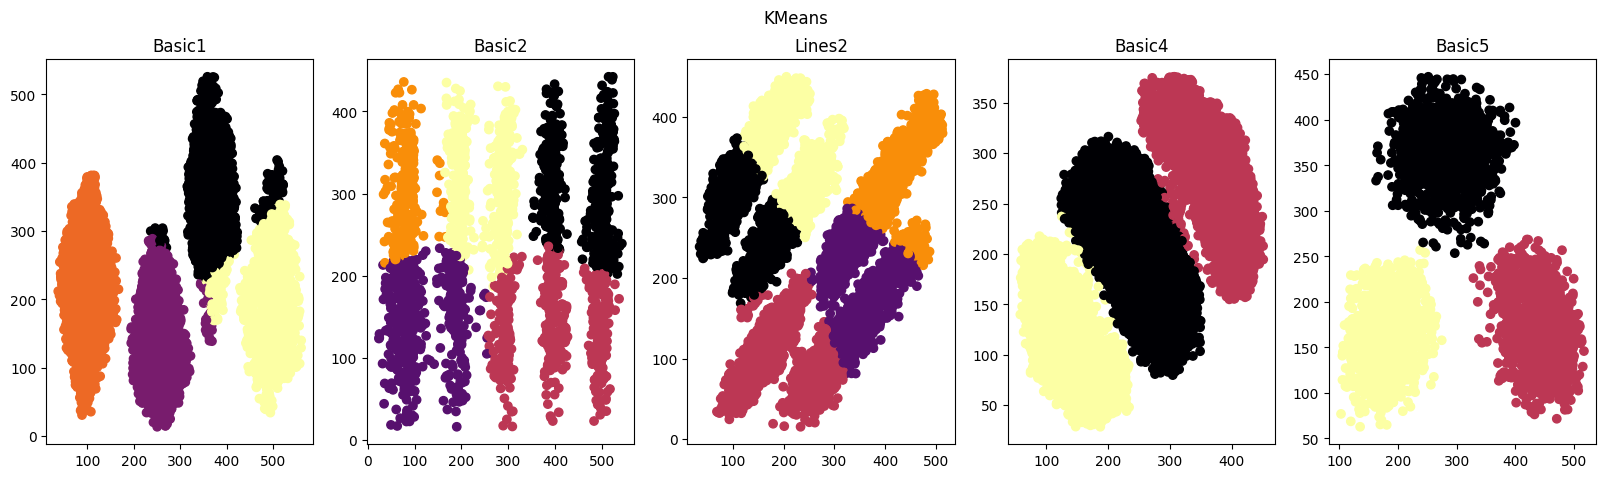

In [6]:
# KMeans

# Apply KMeans
kmeans_basic1 = KMeans(n_clusters=4, random_state=0).fit(df_basic1)
kmeans_basic2 = KMeans(n_clusters=5, random_state=0).fit(df_basic2)
kmeans_lines2 = KMeans(n_clusters=5, random_state=0).fit(df_lines2)
kmeans_basic4 = KMeans(n_clusters=3, random_state=0).fit(df_basic4) 
kmeans_basic5 = KMeans(n_clusters=3, random_state=0).fit(df_basic5)

# Plotting results
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
ax[0].scatter(df_basic1['x'], df_basic1['y'], c=kmeans_basic1.predict(df_basic1))
ax[0].set_title('Basic1')
ax[1].scatter(df_basic2['x'], df_basic2['y'], c=kmeans_basic2.predict(df_basic2))
ax[1].set_title('Basic2')
ax[2].scatter(df_lines2['x'], df_lines2['y'], c=kmeans_lines2.predict(df_lines2))
ax[2].set_title('Lines2')
ax[3].scatter(df_basic4['x'], df_basic4['y'], c=kmeans_basic4.predict(df_basic4))
ax[3].set_title('Basic4')
ax[4].scatter(df_basic5['x'], df_basic5['y'], c=kmeans_basic5.predict(df_basic5))
ax[4].set_title('Basic5')
fig.suptitle('KMeans')
plt.show()

KMeans doesn't work well with non-circular clusters.

Let's see how GMM works on the same data for comparison.
First we try GMM with EM, using the same number of components as K-means.

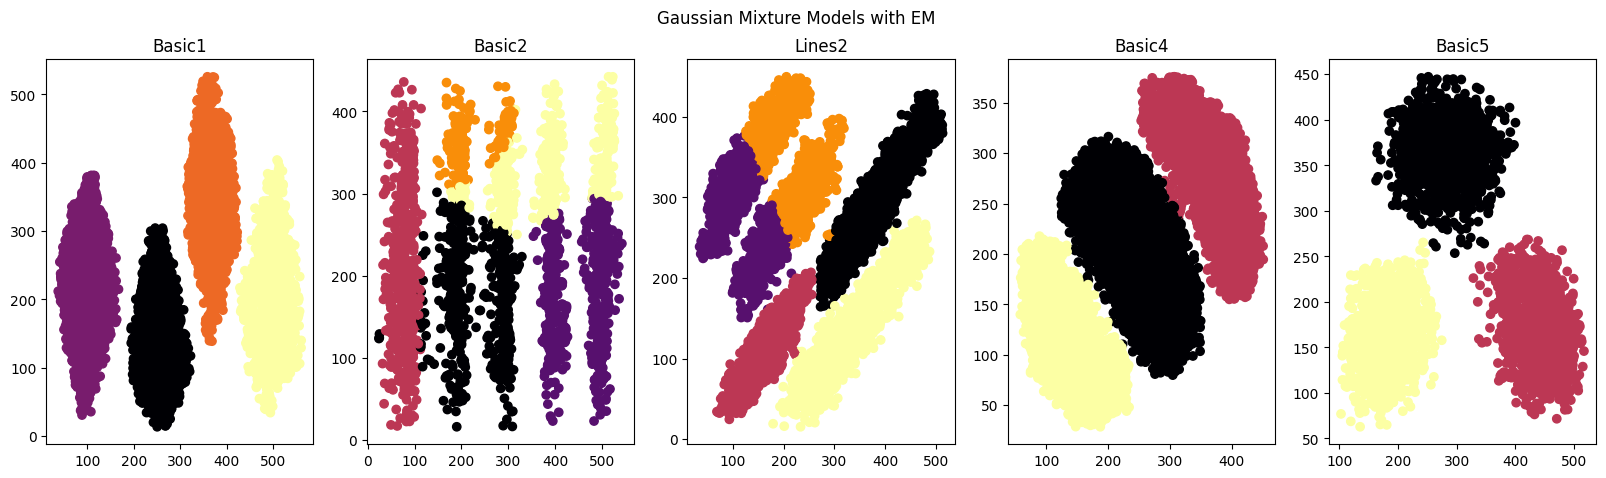

In [7]:
# GMM with EM

# Apply Gaussian Mixture
gmm_basic1 = GaussianMixture(n_components=4, random_state=0, max_iter=5000).fit(df_basic1)
gmm_basic2 = GaussianMixture(n_components=5, random_state=0, max_iter=5000).fit(df_basic2)
gmm_lines2 = GaussianMixture(n_components=5, random_state=0, max_iter=5000).fit(df_lines2)
gmm_basic4 = GaussianMixture(n_components=3, random_state=0, max_iter=5000).fit(df_basic4)
gmm_basic5 = GaussianMixture(n_components=3, random_state=0, max_iter=5000).fit(df_basic5)

# Plotting results
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
ax[0].scatter(df_basic1['x'], df_basic1['y'], c=gmm_basic1.predict(df_basic1))
ax[0].set_title('Basic1')
ax[1].scatter(df_basic2['x'], df_basic2['y'], c=gmm_basic2.predict(df_basic2))
ax[1].set_title('Basic2')
ax[2].scatter(df_lines2['x'], df_lines2['y'], c=gmm_lines2.predict(df_lines2))
ax[2].set_title('Lines2')
ax[3].scatter(df_basic4['x'], df_basic4['y'], c=gmm_basic4.predict(df_basic4))
ax[3].set_title('Basic4')
ax[4].scatter(df_basic5['x'], df_basic5['y'], c=gmm_basic5.predict(df_basic5))
ax[4].set_title('Basic5')
fig.suptitle('Gaussian Mixture Models with EM')
plt.show()


As you can see in this example, GMM with EM works better than K-means when the clusters are not in a circular shape, also it is still good with the convex ones. When the clusters are more line-shaped, GMM with EM still shows some limitations, this is probably due to the fact that GMM with EM is just a generalization of K-means, so it has the same limitations, even tho it is a bit more flexible.

A drawback of both these techniques is that they require the number of clusters to be specified.

Now let's see how Bayesian GMM works on this data.

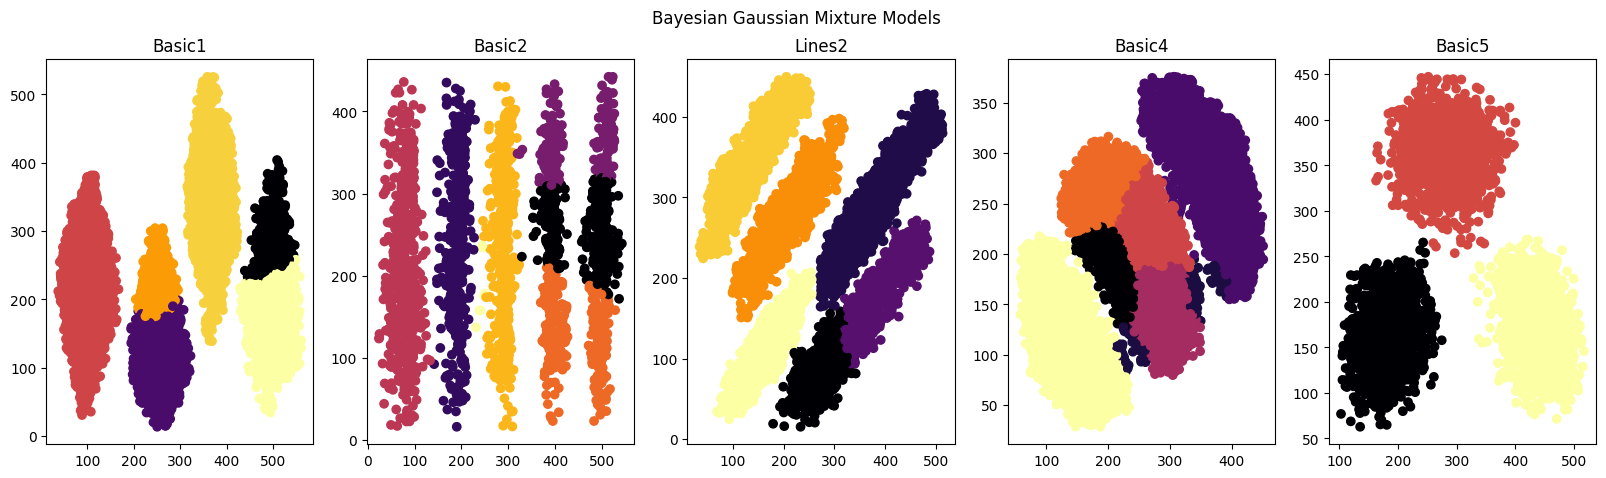

In [39]:
# Bayesian GMM

# Apply Bayesian Gaussian Mixture
## sklearn's implementation of Bayesian GMM requires the number of components to be specified, 
## but if the actual number of components is lower, the model will converge to the correct number of components
bgmm_basic1 = BayesianGaussianMixture(n_components=10, random_state=0, max_iter=5000, init_params="random").fit(df_basic1) # init_params="random" gives better results
bgmm_basic2 = BayesianGaussianMixture(n_components=10, random_state=0, max_iter=5000, init_params="random").fit(df_basic2)
bgmm_lines2 = BayesianGaussianMixture(n_components=10, random_state=0, max_iter=5000, init_params="random").fit(df_lines2)
bgmm_basic4 = BayesianGaussianMixture(n_components=10, random_state=0, max_iter=5000, init_params="random").fit(df_basic4)
bgmm_basic5 = BayesianGaussianMixture(n_components=10, random_state=0, max_iter=5000, init_params="random").fit(df_basic5)

# Plotting results
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
ax[0].scatter(df_basic1['x'], df_basic1['y'], c=bgmm_basic1.predict(df_basic1))
ax[0].set_title('Basic1')
ax[1].scatter(df_basic2['x'], df_basic2['y'], c=bgmm_basic2.predict(df_basic2))
ax[1].set_title('Basic2')
ax[2].scatter(df_lines2['x'], df_lines2['y'], c=bgmm_lines2.predict(df_lines2))
ax[2].set_title('Lines2')
ax[3].scatter(df_basic4['x'], df_basic4['y'], c=bgmm_basic4.predict(df_basic4))
ax[3].set_title('Basic4')
ax[4].scatter(df_basic5['x'], df_basic5['y'], c=bgmm_basic5.predict(df_basic5))
ax[4].set_title('Basic5')
fig.suptitle('Bayesian Gaussian Mixture Models')
plt.show()

Bayesian GMM works better than k-means when the clusters are not circular, like the EM version.

It should also be able to infer the number of components automatically, but it seems that it's able to do it correctly only with really simple datasets like basic5.

sklearn's implementation requires to specify the maximum number of components as a parameter, so that the model won't infer a higher number, let's see if it works better than GMM with EM if the correct number of components is specified. 

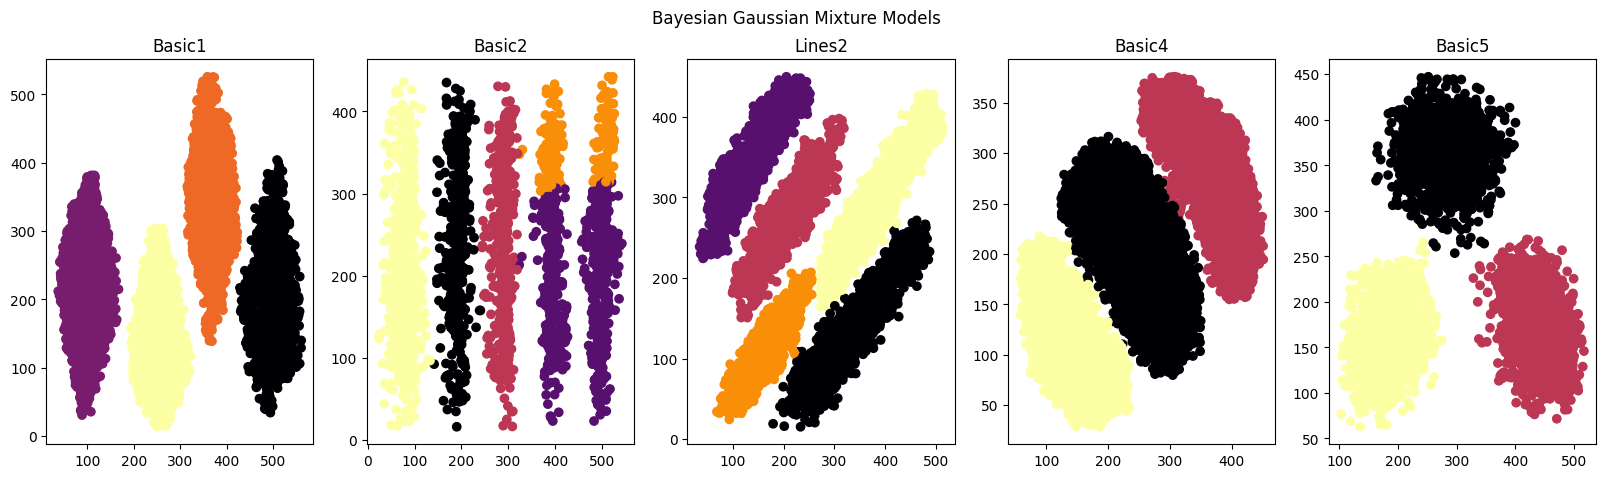

In [9]:
# Bayesian GMM

# Apply Bayesian Gaussian Mixture
## sklearn's implementation of Bayesian GMM requires the number of components to be specified, 
## but if the actual number of components is lower, the model will converge to the correct number of components
bgmm_basic1_spec = BayesianGaussianMixture(n_components=4, random_state=0, max_iter=5000, init_params="random").fit(df_basic1) # init_params="random" gives better results
bgmm_basic2_spec = BayesianGaussianMixture(n_components=5, random_state=0, max_iter=5000, init_params="random").fit(df_basic2)
bgmm_lines2_spec = BayesianGaussianMixture(n_components=5, random_state=0, max_iter=5000, init_params="random").fit(df_lines2)
bgmm_basic4_spec = BayesianGaussianMixture(n_components=3, random_state=0, max_iter=5000).fit(df_basic4)
bgmm_basic5_spec = BayesianGaussianMixture(n_components=3, random_state=0, max_iter=5000, init_params="random").fit(df_basic5)

# Plotting results
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
ax[0].scatter(df_basic1['x'], df_basic1['y'], c=bgmm_basic1_spec.predict(df_basic1))
ax[0].set_title('Basic1')
ax[1].scatter(df_basic2['x'], df_basic2['y'], c=bgmm_basic2_spec.predict(df_basic2))
ax[1].set_title('Basic2')
ax[2].scatter(df_lines2['x'], df_lines2['y'], c=bgmm_lines2_spec.predict(df_lines2))
ax[2].set_title('Lines2')
ax[3].scatter(df_basic4['x'], df_basic4['y'], c=bgmm_basic4_spec.predict(df_basic4))
ax[3].set_title('Basic4')
ax[4].scatter(df_basic5['x'], df_basic5['y'], c=bgmm_basic5_spec.predict(df_basic5))
ax[4].set_title('Basic5')
fig.suptitle('Bayesian Gaussian Mixture Models')
plt.show()

By specifying the correct number of components, Bayesian GMM works better than GMM with EM, but it still has some limitations when the clusters are hihly not circular like in the case of the Basic2 dataset.

### DBSCAN
*Density-Based Special Clustering of Applications with Noise*, commonly know as DBSCAN, is another clustering algorithm. As the name suggests, it belongs to the family of density-based clustering algorithms. It doesn't require the number of clusters to be specified, as Bayesian GMM. Usually it works well with dense, clearly separated clusters, of any shape, even if the separation is not linear.

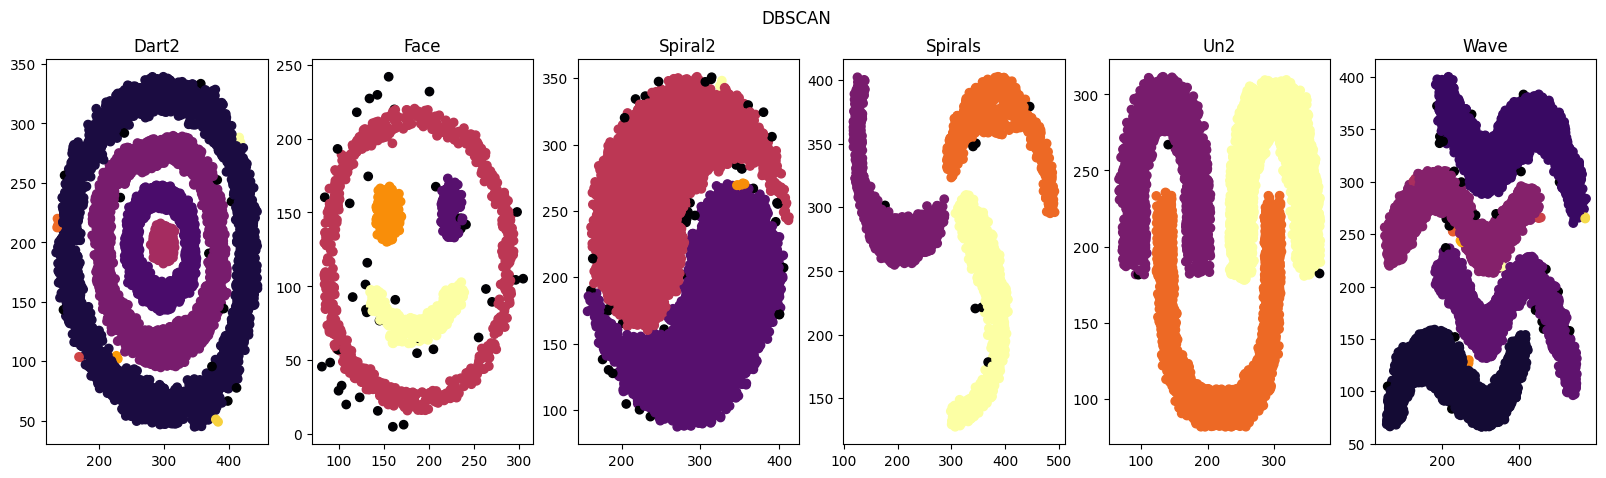

In [11]:
# DBSCAN

# Apply DBSCAN
dbscan_dart2 = DBSCAN(eps=6, min_samples=2).fit(df_dart2)
dbscan_face = DBSCAN(eps=9, min_samples=4).fit(df_face)
dbscan_spiral2 = DBSCAN(eps=5, min_samples=3).fit(df_spiral2)
dbscan_spirals = DBSCAN(eps=7, min_samples=4).fit(df_spirals)
dbscan_un2 = DBSCAN(eps=7, min_samples=5).fit(df_un2)
dbscan_wave = DBSCAN(eps=6, min_samples=2).fit(df_wave)

# Plotting results
fig, ax = plt.subplots(1, 6, figsize=(20, 5))
ax[0].scatter(df_dart2['x'], df_dart2['y'], c=dbscan_dart2.labels_)
ax[0].set_title('Dart2')
ax[1].scatter(df_face['x'], df_face['y'], c=dbscan_face.labels_)
ax[1].set_title('Face')
ax[2].scatter(df_spiral2['x'], df_spiral2['y'], c=dbscan_spiral2.labels_)
ax[2].set_title('Spiral2')
ax[3].scatter(df_spirals['x'], df_spirals['y'], c=dbscan_spirals.labels_)
ax[3].set_title('Spirals')
ax[4].scatter(df_un2['x'], df_un2['y'], c=dbscan_un2.labels_)
ax[4].set_title('Un2')
ax[5].scatter(df_wave['x'], df_wave['y'], c=dbscan_wave.labels_)
ax[5].set_title('Wave')
fig.suptitle('DBSCAN')
plt.show()

This experiment confirms that DBSCAN works well with non-linearly separable data.

The main flaw that has been found during these tests, is that the hyperparameters of DBSCAN are not easy to tune, and they can have a big impact on the results.

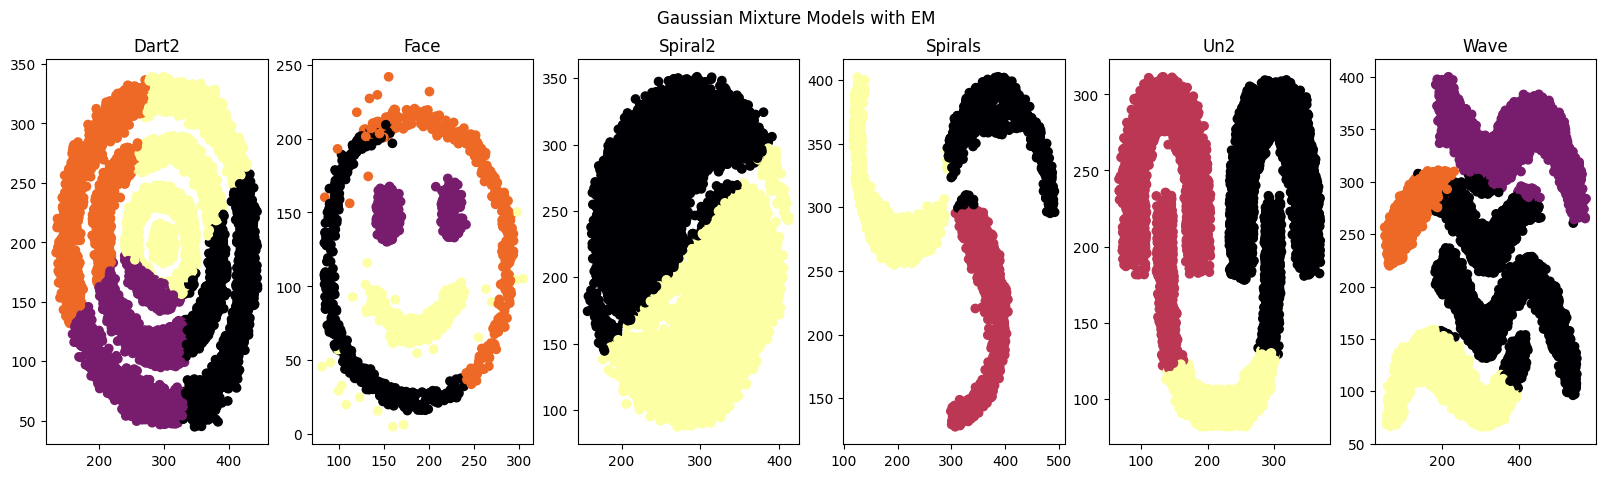

In [35]:
# GMM with EM

# Apply GMM with EM
gmm_dart2 = GaussianMixture(n_components=4, random_state=0, max_iter=5000).fit(df_dart2)
gmm_face = GaussianMixture(n_components=4, random_state=0, max_iter=5000).fit(df_face)
gmm_spiral2 = GaussianMixture(n_components=2, random_state=0, max_iter=5000).fit(df_spiral2)
gmm_spirals = GaussianMixture(n_components=3, random_state=0, max_iter=5000, init_params="random").fit(df_spirals) # init_params="random" gives better results
gmm_un2 = GaussianMixture(n_components=3, random_state=0, max_iter=5000).fit(df_un2)
gmm_wave = GaussianMixture(n_components=4, random_state=0, max_iter=5000).fit(df_wave)

# Plotting results
fig, ax = plt.subplots(1, 6, figsize=(20, 5))
ax[0].scatter(df_dart2['x'], df_dart2['y'], c=gmm_dart2.predict(df_dart2))
ax[0].set_title('Dart2')
ax[1].scatter(df_face['x'], df_face['y'], c=gmm_face.predict(df_face))
ax[1].set_title('Face')
ax[2].scatter(df_spiral2['x'], df_spiral2['y'], c=gmm_spiral2.predict(df_spiral2))
ax[2].set_title('Spiral2')
ax[3].scatter(df_spirals['x'], df_spirals['y'], c=gmm_spirals.predict(df_spirals))
ax[3].set_title('Spirals')
ax[4].scatter(df_un2['x'], df_un2['y'], c=gmm_un2.predict(df_un2))
ax[4].set_title('Un2')
ax[5].scatter(df_wave['x'], df_wave['y'], c=gmm_wave.predict(df_wave))
ax[5].set_title('Wave')
fig.suptitle('Gaussian Mixture Models with EM')
plt.show()

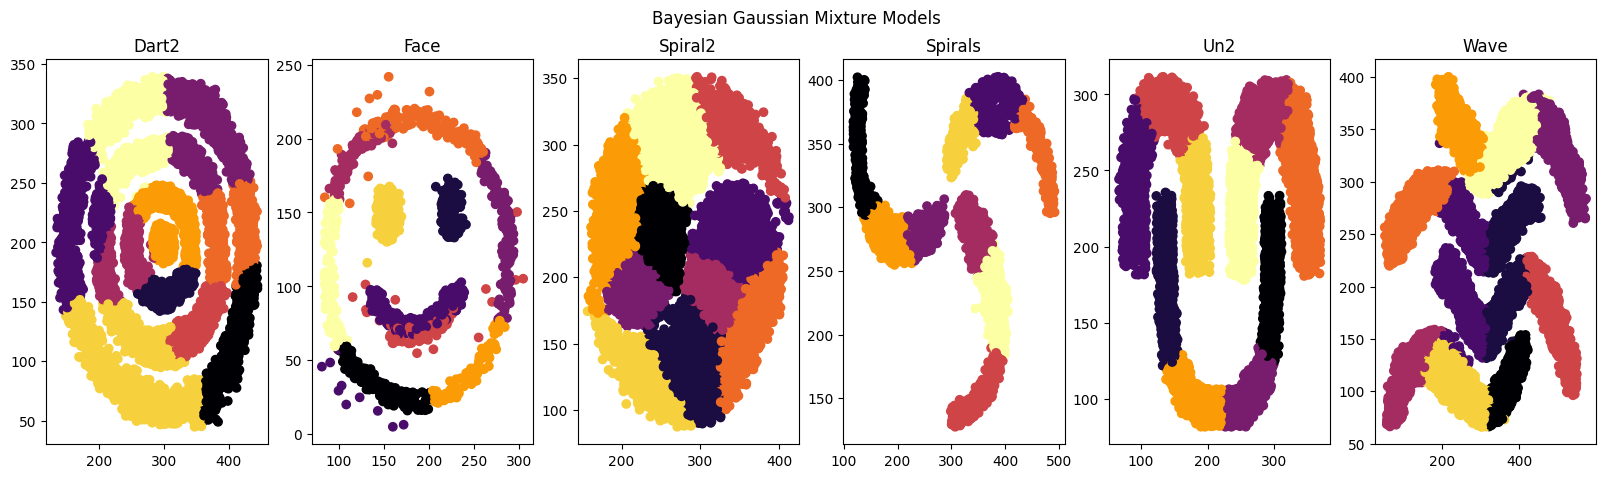

In [53]:
# Bayesian GMM

# Apply Bayesian Gaussian Mixture
## sklearn's implementation of Bayesian GMM requires the number of components to be specified, 
## but if the actual number of components is lower, the model will converge to the correct number of components
bgmm_dart2 = BayesianGaussianMixture(n_components=10, random_state=0, max_iter=5000).fit(df_dart2)
bgmm_face = BayesianGaussianMixture(n_components=10, random_state=0, max_iter=5000).fit(df_face)
bgmm_spiral2 = BayesianGaussianMixture(n_components=10, random_state=0, max_iter=5000).fit(df_spiral2)
bgmm_spirals = BayesianGaussianMixture(n_components=10, random_state=0, max_iter=5000).fit(df_spirals)
bgmm_un2 = BayesianGaussianMixture(n_components=10, random_state=0, max_iter=5000).fit(df_un2)
bgmm_wave = BayesianGaussianMixture(n_components=10, random_state=0, max_iter=5000).fit(df_wave)

# Plotting results
fig, ax = plt.subplots(1, 6, figsize=(20, 5))
ax[0].scatter(df_dart2['x'], df_dart2['y'], c=bgmm_dart2.predict(df_dart2))
ax[0].set_title('Dart2')
ax[1].scatter(df_face['x'], df_face['y'], c=bgmm_face.predict(df_face))
ax[1].set_title('Face')
ax[2].scatter(df_spiral2['x'], df_spiral2['y'], c=bgmm_spiral2.predict(df_spiral2))
ax[2].set_title('Spiral2')
ax[3].scatter(df_spirals['x'], df_spirals['y'], c=bgmm_spirals.predict(df_spirals))
ax[3].set_title('Spirals')
ax[4].scatter(df_un2['x'], df_un2['y'], c=bgmm_un2.predict(df_un2))
ax[4].set_title('Un2')
ax[5].scatter(df_wave['x'], df_wave['y'], c=bgmm_wave.predict(df_wave))
ax[5].set_title('Wave')
fig.suptitle('Bayesian Gaussian Mixture Models')
plt.show()

Again, BGMM showed that it isn't able to infer autonomously the actual number of components in a good way, even worse now that the clusters are not linearly separable.

It could make sense to take a different approach in the case of non-linearly separable data: increase the maximum number of components, and then look at the covariances of the gaussian components to see if a combination of them can be considered as a single cluster.

In [107]:
# Function to plot ellipses representing the covariance matrices

def make_ellipses(gmm, ax, n_ellipses):

    for n in range(n_ellipses):
        if gmm.covariance_type == "full":
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == "tied":
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == "diag":
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == "spherical":
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        
        for nsig in np.arange(.3, 1.5, .3):

            ell = mpl.patches.Ellipse(
                gmm.means_[n, :2], nsig * v[0], nsig * v[1], angle=180 + angle, color="blue"
            )
            ell.set_clip_box(ax.bbox)
            ell.set_alpha(.2)
            ax.add_artist(ell)
            #ax.set_aspect("equal", "datalim")

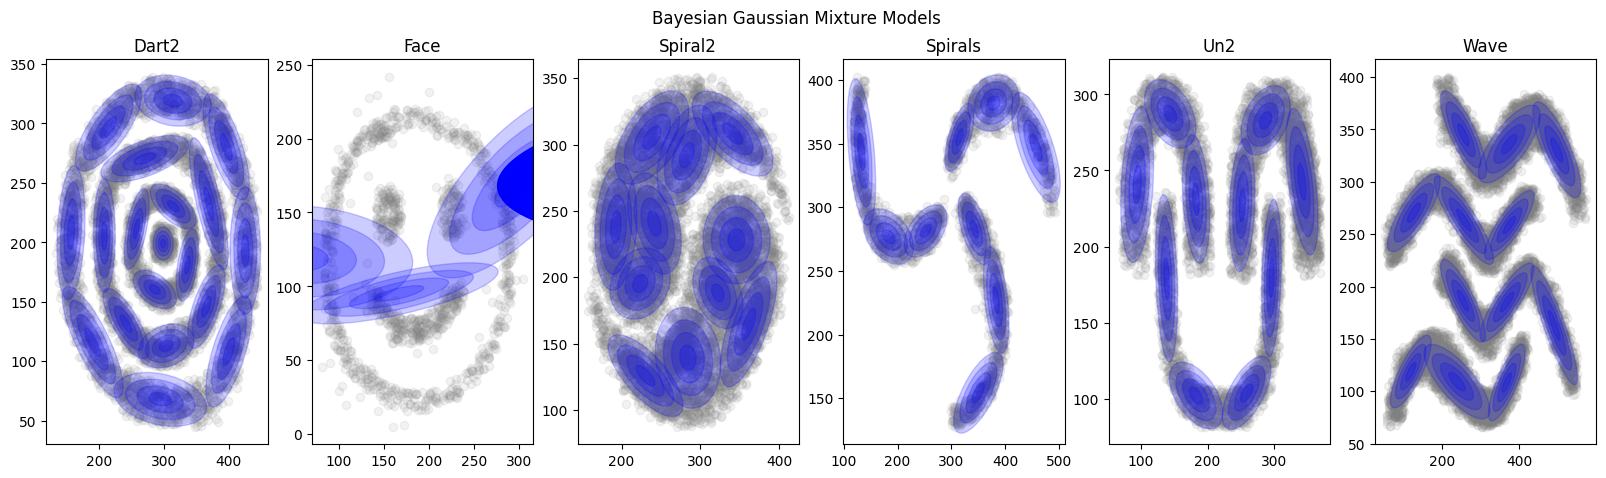

In [108]:
# Apply Bayesian Gaussian Mixture
## sklearn's implementation of Bayesian GMM requires the number of components to be specified, 
## but if the actual number of components is lower, the model will converge to the correct number of components
bgmm_dart2_ellipses = BayesianGaussianMixture(n_components=19, random_state=0, max_iter=5000).fit(df_dart2)
bgmm_face_ellipses = BayesianGaussianMixture(n_components=30, random_state=0, max_iter=5000).fit(df_face)
bgmm_spiral2_ellipses = BayesianGaussianMixture(n_components=11, random_state=0, max_iter=5000).fit(df_spiral2)
bgmm_spirals_ellipses = BayesianGaussianMixture(n_components=9, random_state=0, max_iter=5000).fit(df_spirals)
bgmm_un2_ellipses = BayesianGaussianMixture(n_components=10, random_state=0, max_iter=5000).fit(df_un2)
bgmm_wave_ellipses = BayesianGaussianMixture(n_components=12, random_state=0, max_iter=5000).fit(df_wave)

# Plotting results, with ellipses
fig, ax = plt.subplots(1, 6, figsize=(20, 5))
ax[0].scatter(df_dart2['x'], df_dart2['y'], c="grey", alpha=0.1)
make_ellipses(bgmm_dart2_ellipses, ax[0], 19)
ax[0].set_title('Dart2')
ax[1].scatter(df_face['x'], df_face['y'], c="grey", alpha=0.1)
make_ellipses(bgmm_face_ellipses, ax[1], 30)
ax[1].set_title('Face')
ax[2].scatter(df_spiral2['x'], df_spiral2['y'], c="grey", alpha=0.1)
make_ellipses(bgmm_spiral2_ellipses, ax[2], 11)
ax[2].set_title('Spiral2')
ax[3].scatter(df_spirals['x'], df_spirals['y'], c="grey", alpha=0.1)
make_ellipses(bgmm_spirals_ellipses, ax[3], 9)
ax[3].set_title('Spirals')
ax[4].scatter(df_un2['x'], df_un2['y'], c="grey", alpha=0.1)
make_ellipses(bgmm_un2_ellipses, ax[4], 10)
ax[4].set_title('Un2')
ax[5].scatter(df_wave['x'], df_wave['y'], c="grey", alpha=0.1)
make_ellipses(bgmm_wave_ellipses, ax[5], 12)
ax[5].set_title('Wave')
plt.suptitle('Bayesian Gaussian Mixture Models')
plt.show()

Except for the case of the Face dataset, this approach seems to work well. It doesn't actually solve the clustering problem, but this experiment shows that it is somehow possible to perform clustering on non-linearly separable data using an extended version of Gaussian Mixture Models. 


### Hierarchical agglomerative clustering
*Hierarchical clustering* is a method for clustering. It creates groups so that objects within a group are similar to each other and different from objects that belong to another group. 
Different approches to solve the Hierarchical problem include Agglomerative (bottom-up) and Divisive (top-down).

HAC can handle clusters of varying sizes and non-convex shapes more naturally than GMM, let's compare them.

In [6]:
# Hierarchical Agglomerative Clustering

# Apply Hierarchical Agglomerative Clustering
hclust_boxes = AgglomerativeClustering(n_clusters=30).fit(df_boxes)
hclust_boxes2 = AgglomerativeClustering(n_clusters=3, linkage='single').fit(df_boxes2)
hclust_boxes3 = AgglomerativeClustering(n_clusters=12).fit(df_boxes3)
#hclust_chrome = AgglomerativeClustering(n_clusters=4).fit(df_chrome)
#hclust_supernova = AgglomerativeClustering(n_clusters=4).fit(df_supernova)

# Plotting results
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
ax[0].scatter(df_boxes['x'], df_boxes['y'], c=hclust_boxes.labels_)
ax[0].set_title('Boxes')
ax[1].scatter(df_boxes2['x'], df_boxes2['y'], c=hclust_boxes2.labels_)
ax[1].set_title('Boxes2')
ax[2].scatter(df_boxes3['x'], df_boxes3['y'], c=hclust_boxes3.labels_)
ax[2].set_title('Boxes3')
#ax[3].scatter(df_chrome['x'], df_chrome['y'], c=hclust_chrome.labels_)
#ax[3].set_title('Chrome')
#ax[4].scatter(df_supernova['x'], df_supernova['y'], c=hclust_supernova.labels_)
#ax[4].set_title('Supernova')
plt.suptitle('Hierarchical Agglomerative Clustering')
plt.show()

: 

: 

# Conclusion